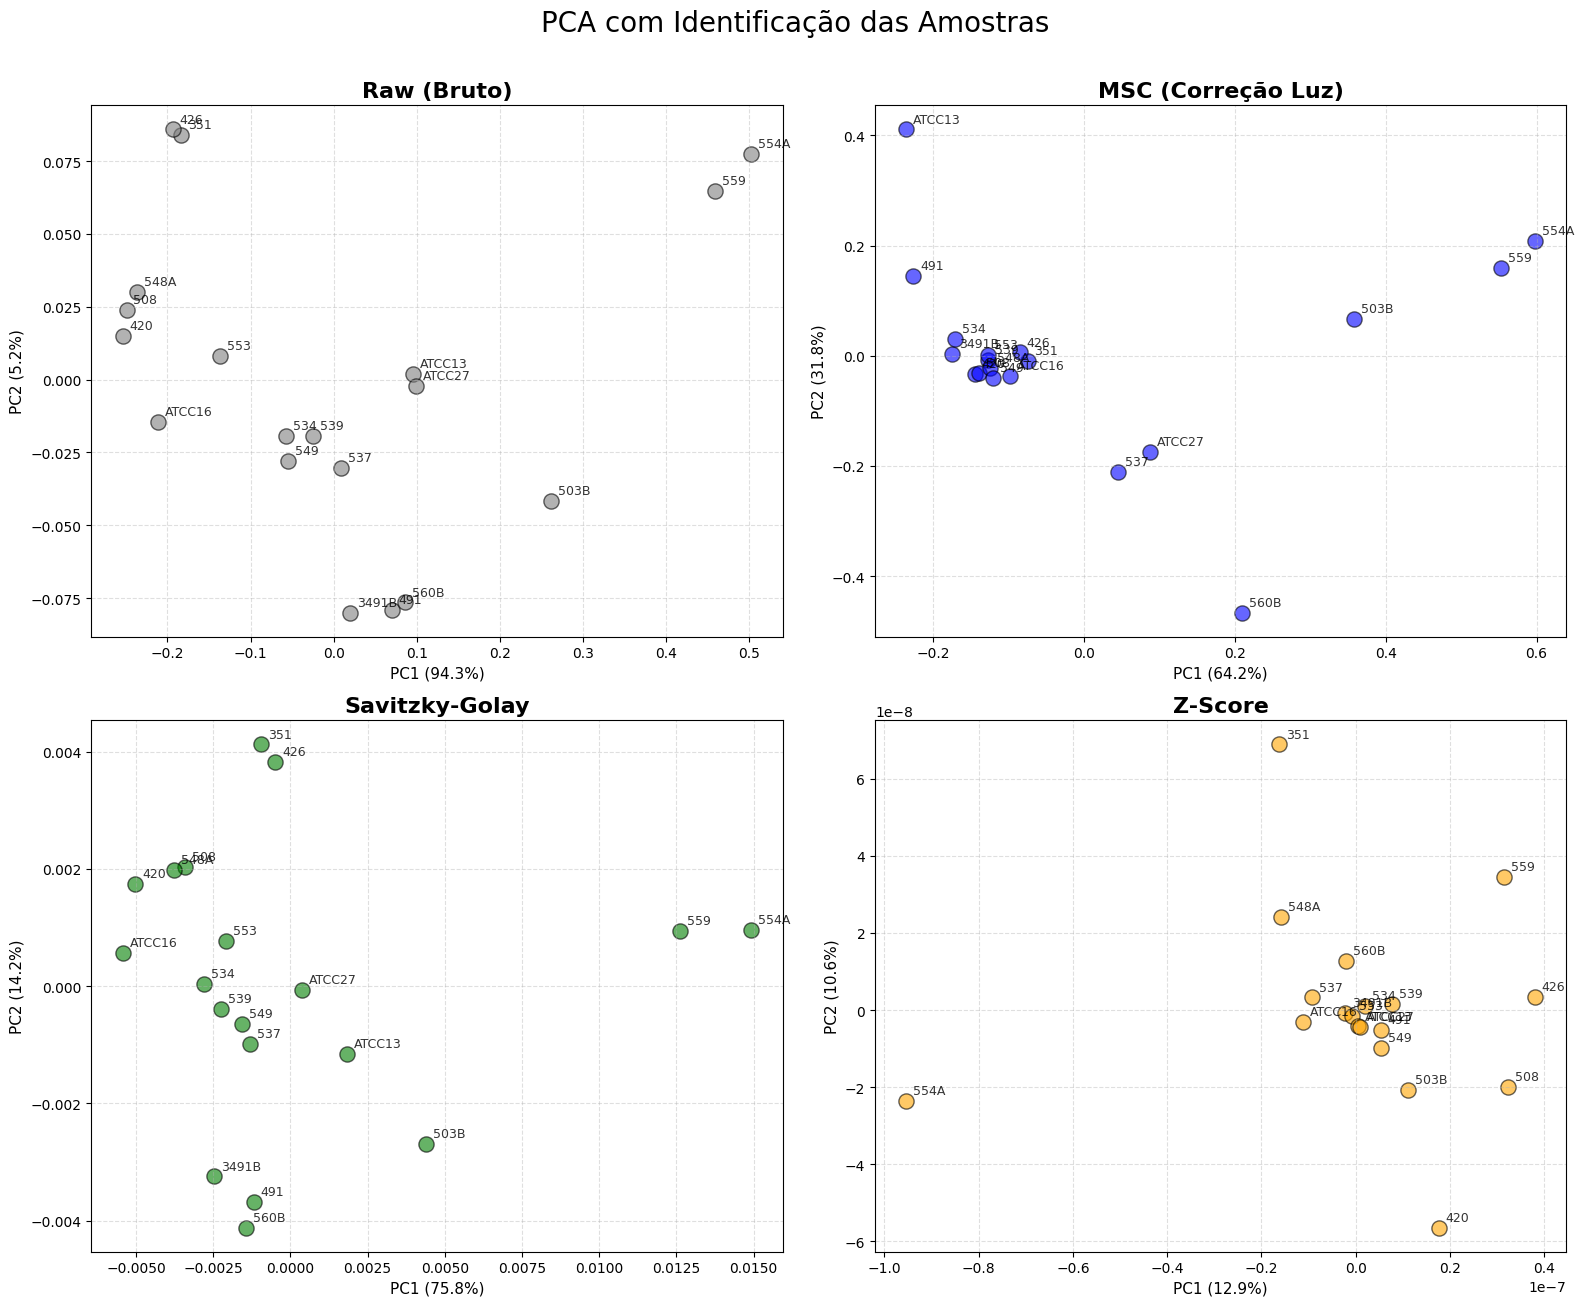

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA

notebook_path = os.getcwd()
project_root = os.path.dirname(notebook_path)
if project_root not in sys.path: sys.path.append(project_root)

BASE_SILVER = Path(project_root) / "data/silver level"
PATH_CSVS = BASE_SILVER / "dados_calibrados"
PATH_RAW = PATH_CSVS / "raw"
PATH_MSC = PATH_CSVS / "msc"
PATH_SG  = PATH_CSVS / "savigol"
PATH_ZS  = PATH_CSVS / "z_score"

def plotar_pca_com_nomes():
    comparacoes = [
        ("Raw (Bruto)", PATH_RAW, "gray"),
        ("MSC (Correção Luz)", PATH_MSC, "blue"),
        ("Savitzky-Golay", PATH_SG, "green"),
        ("Z-Score", PATH_ZS, "orange")
    ] 
    fig, axes = plt.subplots(2, 2, figsize=(16, 14)) # Aumentei um pouco
    fig.suptitle('PCA com Identificação das Amostras', fontsize=20, y=0.96)
    axes = axes.flatten()
    for i, (nome_metodo, path_pasta, cor) in enumerate(comparacoes):
        ax = axes[i]
        if not path_pasta.exists(): continue
        arquivos = sorted(list(path_pasta.glob("*.csv")))
        if not arquivos: continue
        dados = []
        nomes_amostras = []
        for arq in arquivos:
            df = pd.read_csv(arq, header=None)
            dados.append(df.mean(axis=0).values)
            nome_curto = arq.stem.split('_')[0] 
            nomes_amostras.append(nome_curto)
        X = np.array(dados)
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        var_exp = pca.explained_variance_ratio_ * 100
        ax.scatter(X_pca[:, 0], X_pca[:, 1], color=cor, alpha=0.6, s=120, edgecolors='k')
        for j, txt in enumerate(nomes_amostras):
            ax.annotate(txt, (X_pca[j, 0], X_pca[j, 1]), 
                        fontsize=9, xytext=(5, 5), textcoords='offset points', alpha=0.8)
        ax.set_title(f"{nome_metodo}", fontsize=16, fontweight='bold')
        ax.set_xlabel(f"PC1 ({var_exp[0]:.1f}%)", fontsize=11)
        ax.set_ylabel(f"PC2 ({var_exp[1]:.1f}%)", fontsize=11)
        ax.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plotar_pca_com_nomes()

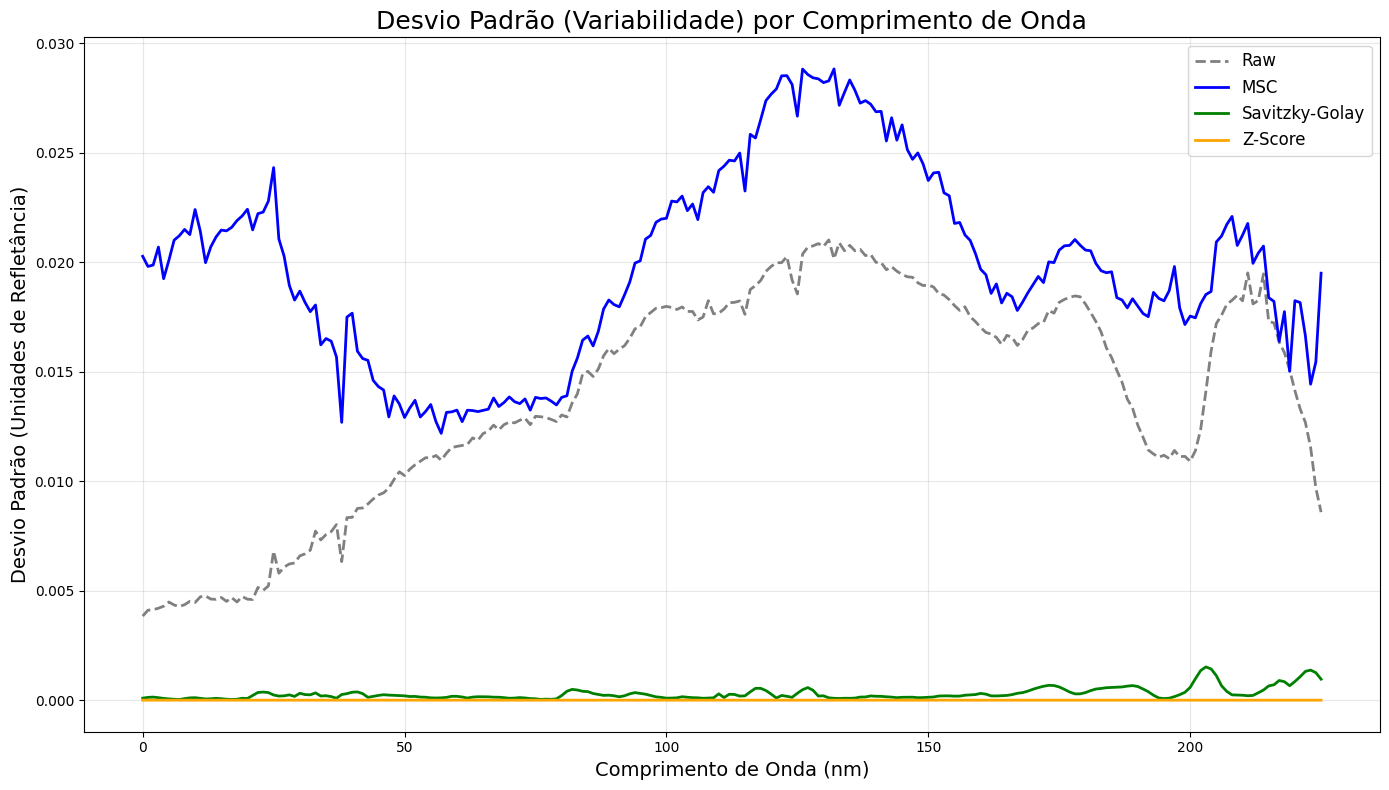

In [ ]:
def plotar_desvio_padrao_comparativo():
    comparacoes = [
        ("Raw", PATH_RAW, "gray", "--"),
        ("MSC", PATH_MSC, "blue", "-"),
        ("Savitzky-Golay", PATH_SG, "green", "-"),
        ("Z-Score", PATH_ZS, "orange", "-")
    ]
    plt.figure(figsize=(14, 8))
    plt.title("Desvio Padrão (Variabilidade) por Comprimento de Onda", fontsize=18)
    for nome, path_pasta, cor, estilo in comparacoes:
        if not path_pasta.exists(): continue
        arquivos = sorted(list(path_pasta.glob("*.csv")))
        if not arquivos: continue   
        dados = []
        for arq in arquivos:
            df = pd.read_csv(arq, header=None)
            dados.append(df.mean(axis=0).values)
        X = np.array(dados)
        std_val = np.std(X, axis=0)
        eixo_x = wavelengths if 'wavelengths' in globals() and wavelengths is not None else np.arange(len(std_val))
        plt.plot(eixo_x, std_val, label=f"{nome}", color=cor, linestyle=estilo, linewidth=2)
    plt.xlabel("Comprimento de Onda (nm)", fontsize=14)
    plt.ylabel("Desvio Padrão (Unidades de Refletância)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plotar_desvio_padrao_comparativo()

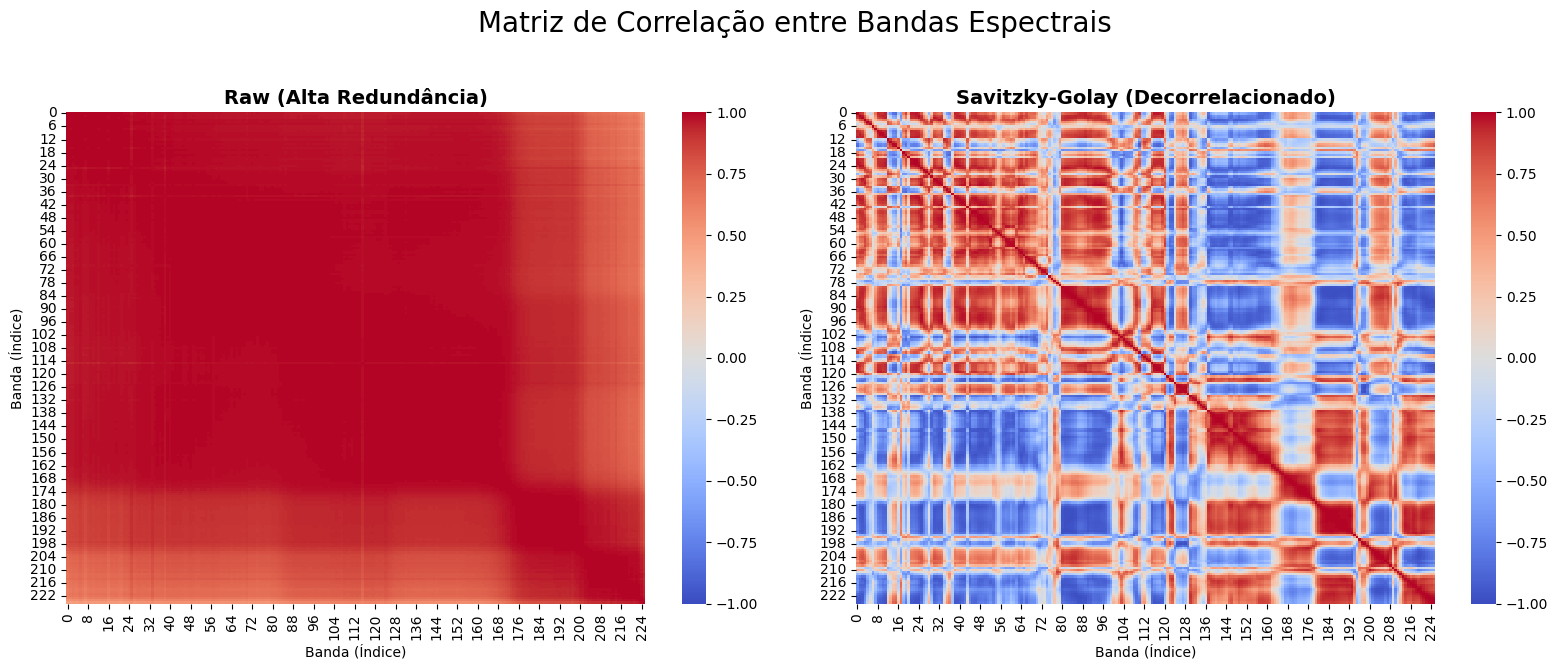

In [ ]:
import seaborn as sns

def plotar_matrizes_correlacao():
    comparacoes = [
        ("Raw (Alta Redundância)", PATH_RAW),
        ("Savitzky-Golay (Decorrelacionado)", PATH_SG)
    ]
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle('Matriz de Correlação entre Bandas Espectrais', fontsize=20)
    axes = axes.flatten()
    for i, (titulo, path_pasta) in enumerate(comparacoes):
        ax = axes[i]
        arquivos = sorted(list(path_pasta.glob("*.csv")))
        dados = []
        for arq in arquivos:
            df = pd.read_csv(arq, header=None)
            dados.append(df.mean(axis=0).values)
        X = np.array(dados) 
        df_corr = pd.DataFrame(X)
        matriz_corr = df_corr.corr()
        sns.heatmap(matriz_corr, ax=ax, cmap="coolwarm", vmin=-1, vmax=1, cbar=True)
        ax.set_title(titulo, fontsize=14, fontweight='bold')
        ax.set_xlabel("Banda (Índice)")
        ax.set_ylabel("Banda (Índice)")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plotar_matrizes_correlacao()